In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [144]:
# Find the maximum width and height among the images.
max_width = 0
max_height = 0
maxw_index = 0
maxh_index = 0
for i in range(1,1585):
    image = cv2.imread("images\\"+str(i)+".jpg")
    height,width = image.shape[:2]
    if max_width < width:
        max_width = width
        maxw_index = i
    if max_height < height:
        max_height = height
        maxh_index = i
    
print (max_width,max_height)
print (maxw_index,maxh_index)
# Max width of 1706 occurs in 1338.jpg
# Max height of 1089 occurs in 573.jpg

(1706L, 1089L)
(1338, 573)


In [73]:
# Example of padding a single image.
i = 1
image = cv2.imread("images\\"+str(i)+".jpg")
height,width = image.shape[:2]
max_width = 1706
max_height = 1089
half_width_diff = (max_width-width)/2.0
half_height_diff = (max_height-height)/2.0
left_pad = int(np.floor(half_width_diff))
right_pad = int(np.ceil(half_width_diff))
top_pad = int(np.floor(half_height_diff))
bottom_pad = int(np.ceil(half_height_diff))
result = cv2.copyMakeBorder(image, top_pad, bottom_pad, left_pad, right_pad, cv2.BORDER_CONSTANT, 0);
print image.shape[:2]
print result.shape[:2]

(467L, 526L)
(1089L, 1706L)


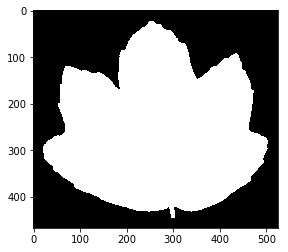

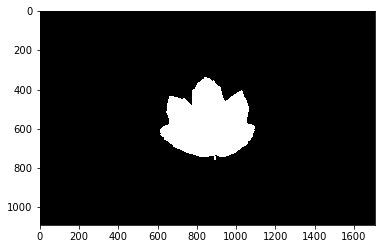

In [74]:
plt.imshow(image)
plt.show()
plt.imshow(result)
plt.show()

In [76]:
# Construct all of the padded images.

max_width = 1706
max_height = 1089
    
for i in range(1,1585):
    image = cv2.imread("images\\"+str(i)+".jpg")
    height,width = image.shape[:2]
    half_width_diff = (max_width-width)/2.0
    half_height_diff = (max_height-height)/2.0
    left_pad = int(np.floor(half_width_diff))
    right_pad = int(np.ceil(half_width_diff))
    top_pad = int(np.floor(half_height_diff))
    bottom_pad = int(np.ceil(half_height_diff))
    result = cv2.copyMakeBorder(image, top_pad, bottom_pad, left_pad, right_pad, cv2.BORDER_CONSTANT, 0);
    cv2.imwrite("padded_images\\"+str(i)+".jpg",result)

In [136]:
# Method to compute indices of minimal bounding box for images.
# Finds the first x and y indices where a non-black color appears.

def bounding_box(image):
    height,width = image.shape[:2]
    x_min = 0
    x_max = width-1
    y_min = 0
    y_max = height-1
    for i in range(height):
        if np.any(image[i]):
            y_min = i
            break
    for i in range(height):
        if np.any(image[-i]):
            y_max = height-1-i
            break
    image_transpose = cv2.transpose(image)
    for i in range(width):
        if np.any(image_transpose[i]):
            x_min = i
            break
    for i in range(width):
        if np.any(image_transpose[-i]):
            x_max = width-1-i
            break
    return y_min,y_max,x_min,x_max

448 638 544 1158


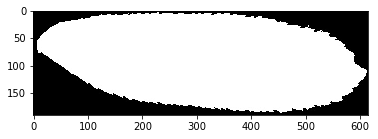

In [139]:
i = 2
image = cv2.imread("padded_images\\"+str(i)+".jpg")
height,width = image.shape[:2]
y_min,y_max,x_min,x_max = bounding_box(image)
print y_min,y_max,x_min,x_max
# Display cropped image with minimal negative space
plt.imshow(image[y_min:y_max+1,x_min:x_max+1])
plt.show()

In [141]:
# Find the minimal universal bounding box for all padded images

y_lower = 1088
y_upper = 0
x_lower = 1705
x_upper = 0

for i in range(1,1585):
    image = cv2.imread("padded_images\\"+str(i)+".jpg")
    y_min,y_max,x_min,x_max = bounding_box(image)
    if y_lower > y_min:
        y_lower = y_min
    if y_upper < y_max:
        y_upper = y_max
    if x_lower > x_min:
        x_lower = x_min
    if x_upper < x_max:
        x_upper = x_max
    if i % 100 == 0: print (y_lower,y_upper,x_lower,x_upper)
        
print (y_lower,y_upper,x_lower,x_upper)
# y_lower = 24
# y_upper = 1062
# x_lower = 24
# x_upper = 1678

(272, 814L, 448, 1254L)
(176, 902L, 232, 1454L)
(176, 902L, 232, 1454L)
(176, 902L, 104, 1590L)
(104, 990L, 104, 1590L)
(104, 990L, 104, 1590L)
(104, 990L, 104, 1590L)
(104, 990L, 104, 1590L)
(104, 990L, 104, 1590L)
(104, 990L, 104, 1590L)
(104, 990L, 104, 1590L)
(104, 990L, 104, 1590L)
(40, 1046L, 104, 1590L)
(40, 1046L, 104, 1590L)
(40, 1046L, 104, 1590L)
(40, 1046L, 104, 1590L)
(40, 1046L, 104, 1590L)
(40, 1046L, 104, 1590L)
(40, 1046L, 104, 1590L)
(40, 1046L, 48, 1622L)
(40, 1046L, 48, 1622L)
(40, 1046L, 48, 1622L)
(40, 1046L, 48, 1622L)
(40, 1046L, 48, 1622L)
(40, 1046L, 48, 1622L)
(40, 1046L, 48, 1622L)
(40, 1046L, 48, 1622L)
(40, 1046L, 48, 1622L)
(40, 1046L, 48, 1622L)
(40, 1046L, 48, 1622L)
(40, 1046L, 48, 1622L)
(40, 1046L, 48, 1622L)
(40, 1046L, 48, 1622L)
(40, 1046L, 48, 1622L)
(40, 1046L, 48, 1622L)
(40, 1046L, 48, 1622L)
(40, 1046L, 48, 1622L)
(40, 1046L, 48, 1622L)
(40, 1046L, 48, 1622L)
(40, 1046L, 48, 1622L)
(40, 1046L, 48, 1622L)
(40, 1046L, 48, 1622L)
(40, 1046L, 48,

In [143]:
# Create library of cropped images

y_lower = 24
y_upper = 1062
x_lower = 24
x_upper = 1678

for i in range(1,1585):
    image = cv2.imread("padded_images\\"+str(i)+".jpg")
    cv2.imwrite("cropped_images\\"+str(i)+".jpg",image[y_lower:y_upper+1,x_lower:x_upper+1])